In [1]:
import os

import torch.nn as nn
import torchvision as tv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image

In [8]:
class DatasetLoader(Dataset):
    def __init__(self, metadata, img_dir, transform=None):
        """
        Args:
            metadata (DataFrame): DataFrame containing image file names and labels.
            img_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.metadata = metadata
        self.img_dir = img_dir
        self.transform = transform
        # Create a mapping for class names to indices
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(metadata['dx'].unique())}

    def __len__(self):
        return len(self.metadata)
    
    def __getitem__(self, idx):
        #lesion_id, image_id, dx, dx_type, age, sex, localization
        img_name = os.path.join(self.img_dir, self.metadata.iloc[idx, 1] + '.jpg')
        image = Image.open(img_name)
        label_name = self.metadata.iloc[idx,2]
        label = self.class_to_idx[label_name]
        filename = self.metadata.iloc[idx, 1]
    
        if self.transform:
            image = self.transform(image)

        return image, label, filename

In [3]:
img_path = './data/images/'
metadata_path = './data/HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

In [4]:
transform = tv.transforms.Compose([
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = DatasetLoader(metadata=metadata, img_dir=img_path, transform=transform)


In [5]:
# Split the dataset 60-20-20
train_size = int(0.6 * len(dataset))
validation_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

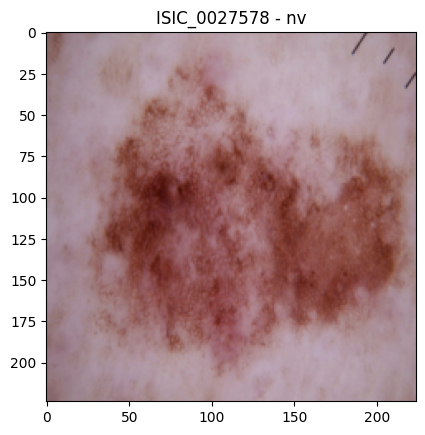

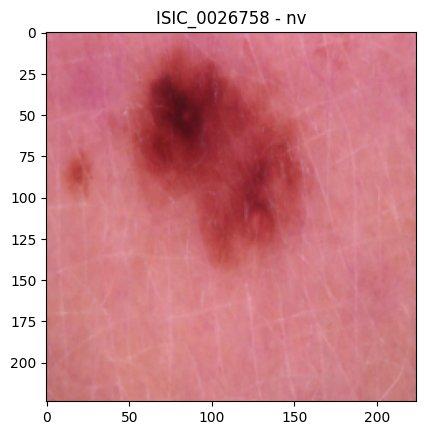

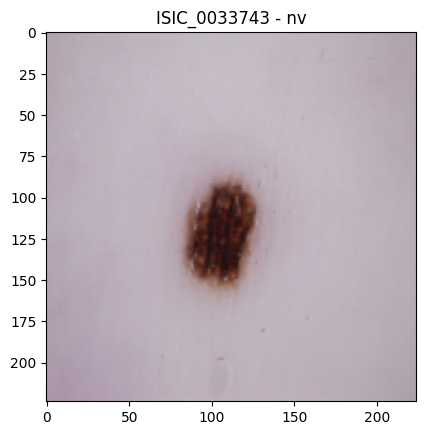

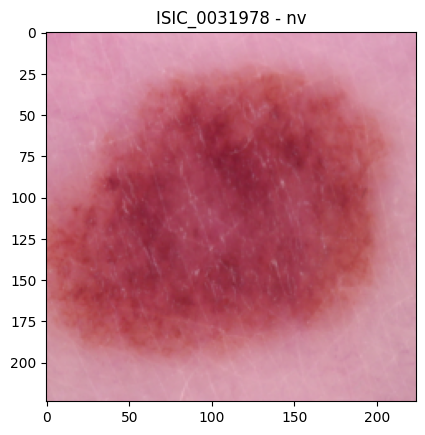

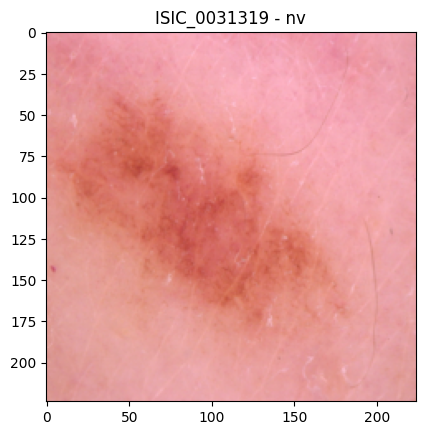

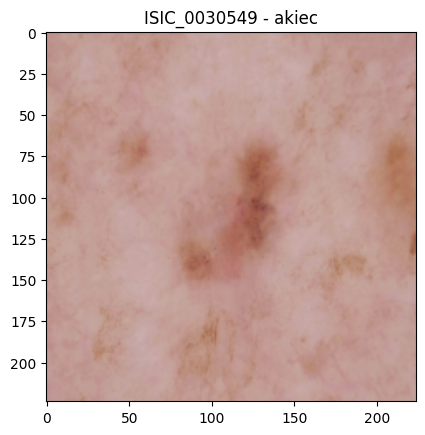

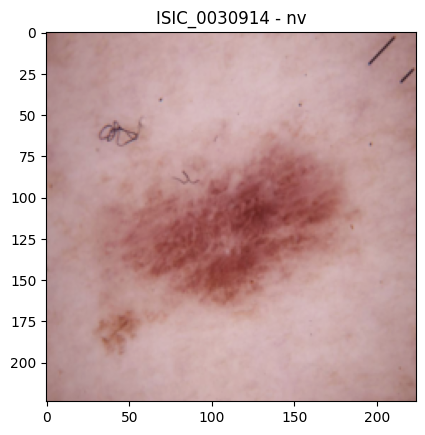

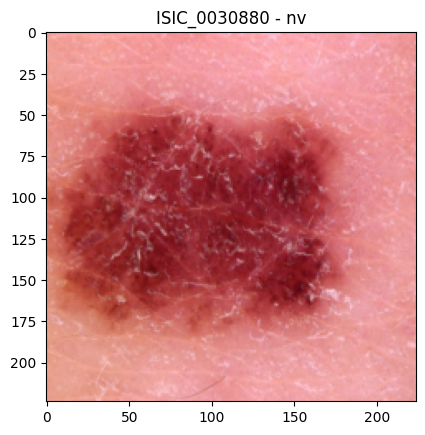

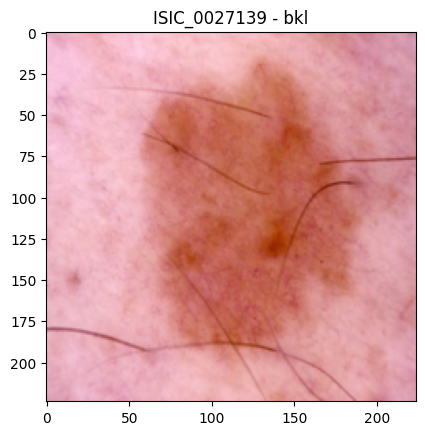

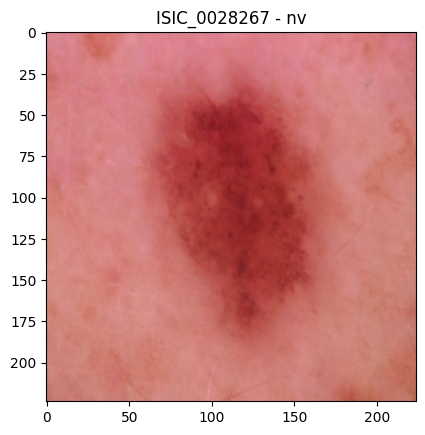

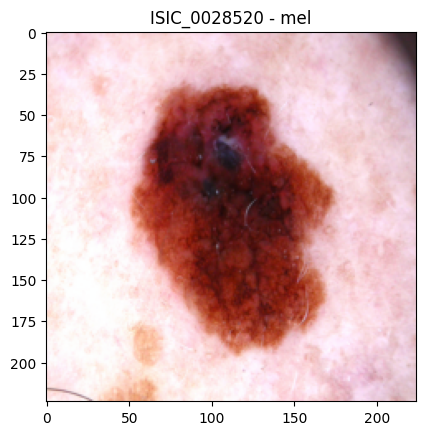

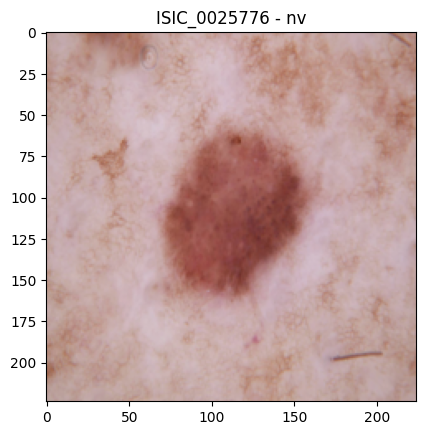

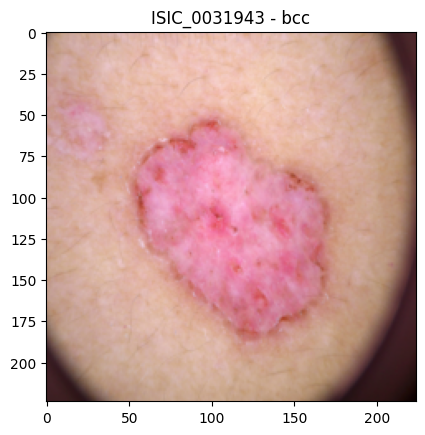

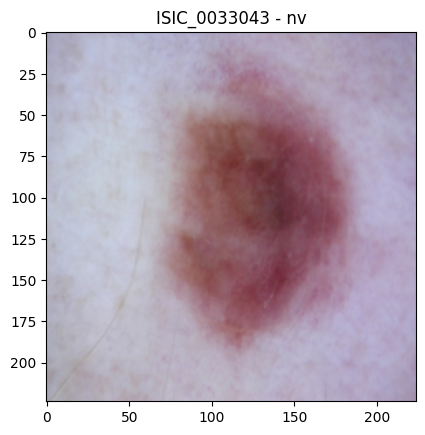

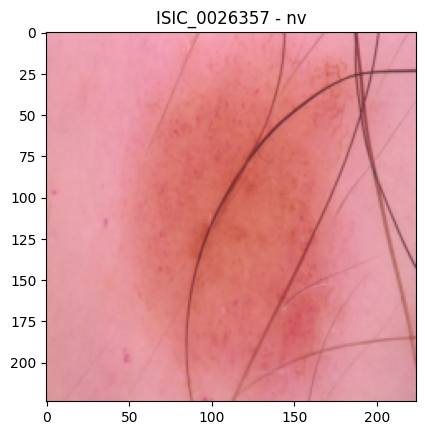

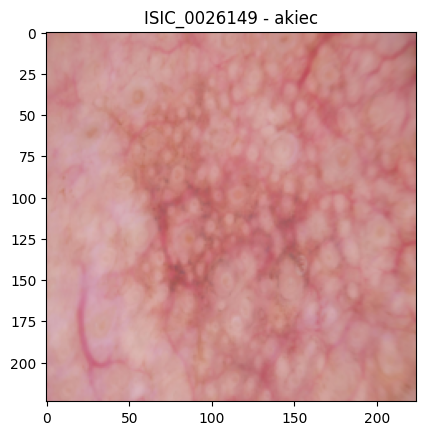

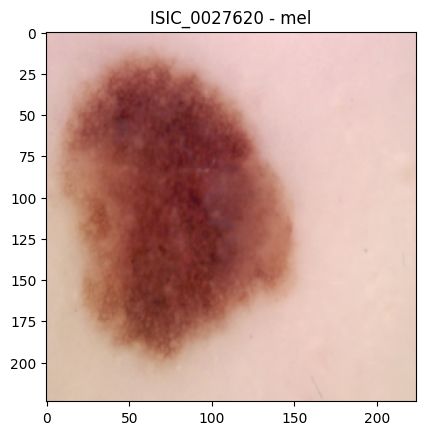

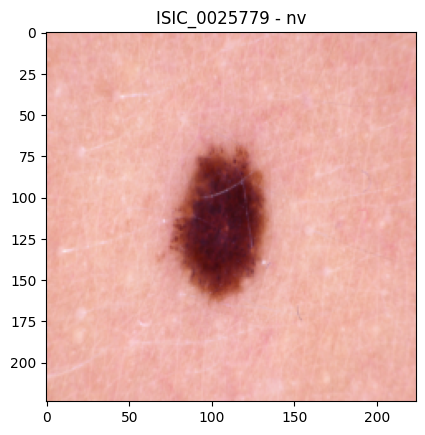

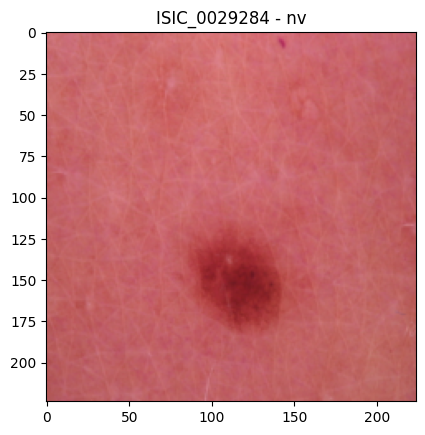

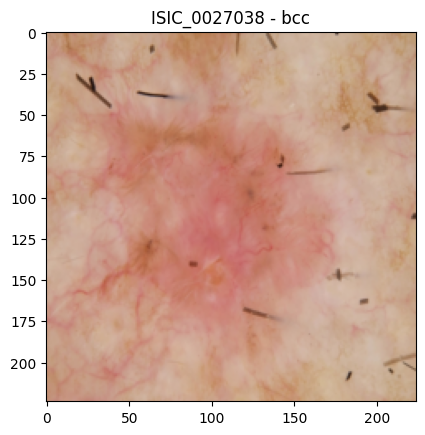

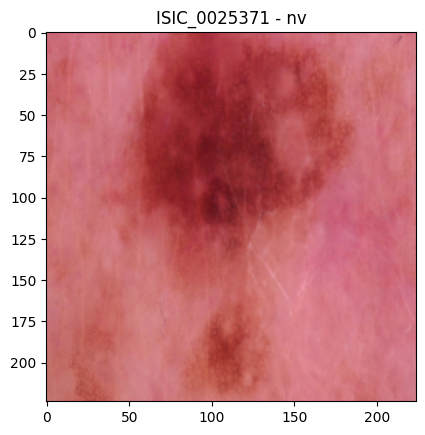

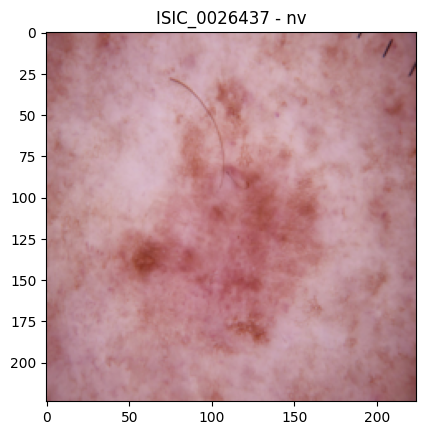

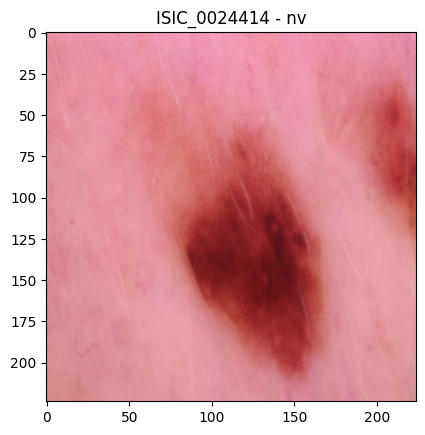

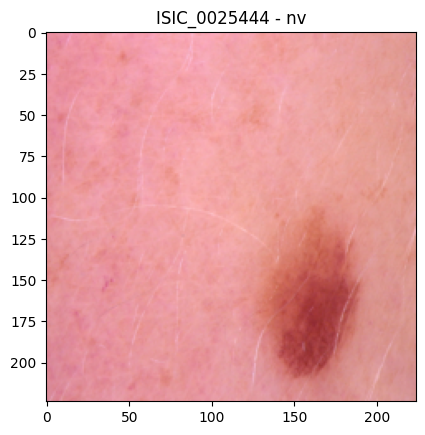

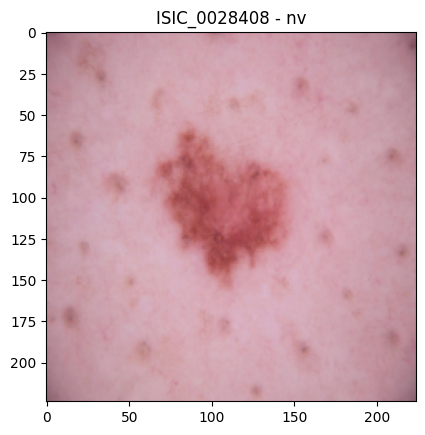

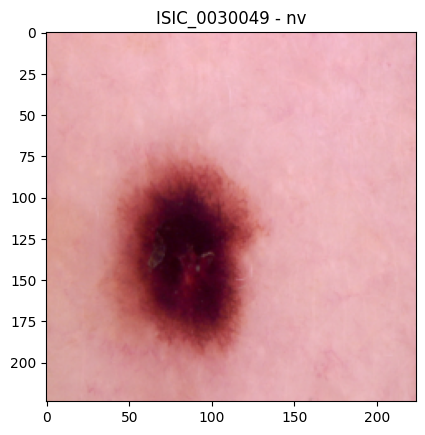

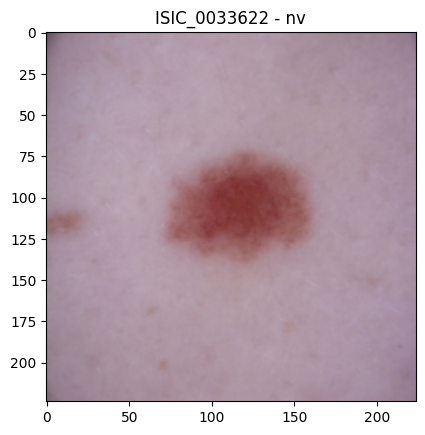

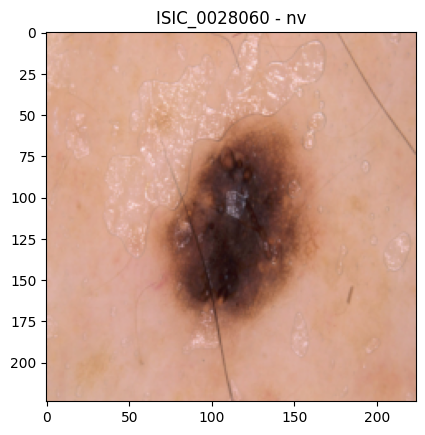

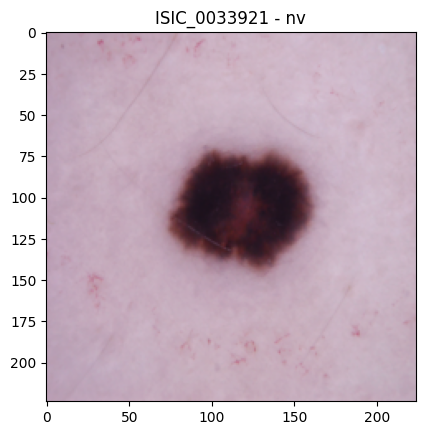

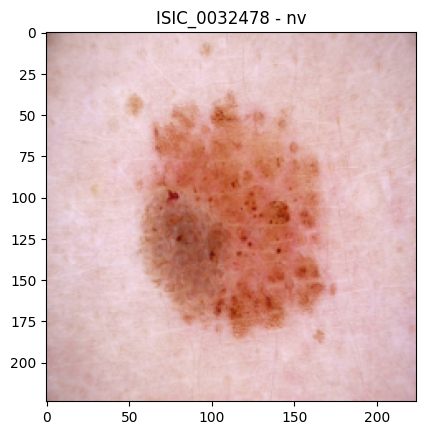

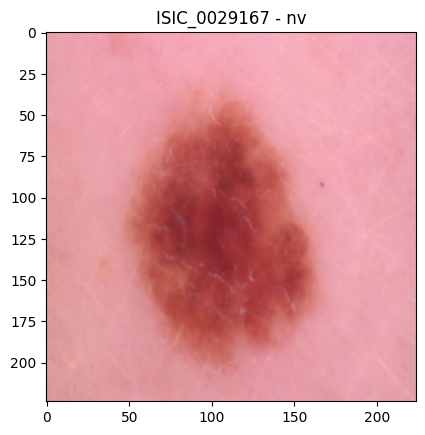

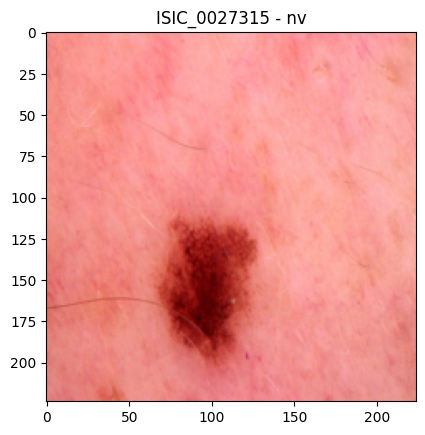

In [9]:
#Used ChatGPT to generate this code to make sure that the images are properly extracted

class_names = metadata['dx'].unique().tolist()

def imshow(inp, label, filename, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # Unnormalize
    inp = np.clip(inp, 0, 1)  # Clip to the valid range [0,1]
    plt.imshow(inp)
    
    plt.title(f"{filename} - {class_names[label]}")
    plt.show()

# Get a batch of training data
inputs, classes, filenames = next(iter(train_loader))

# Visualize each image with its filename and label
for i in range(len(inputs)):
    imshow(inputs[i], classes[i], filenames[i])